In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix

import itertools

## Creating data to view and fit

In [2]:
n_samples = 1000
# Create circles
X, Y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
# Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
Y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'label': Y})

In [6]:
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


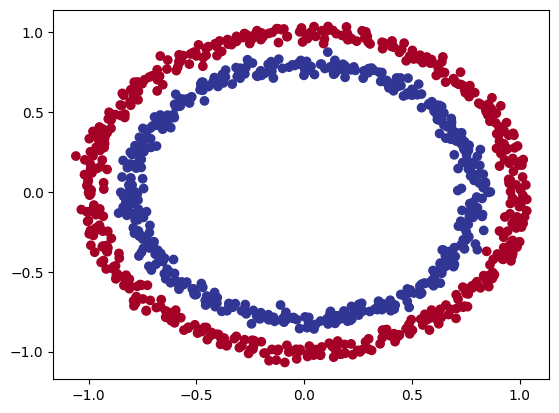

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlBu)

## Input and Output Shapes

In [8]:
X.shape, Y.shape

((1000, 2), (1000,))

## Modelling

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, Y, epochs=5)

Epoch 1/5
32/32 [==============================] - 4s 3ms/step - loss: 2.1506 - accuracy: 0.4640
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7265 - accuracy: 0.4970
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7036 - accuracy: 0.4900
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4930


In [10]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, Y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, Y)   

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [11]:
# Try adding another layer
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, Y, epochs=100, verbose=0)

In [12]:
# Evaluate the model
model_2.evaluate(X, Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5000


[0.6943073272705078, 0.5]

## Improving the model

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [14]:
# 3. Fit the model
model_3.fit(X, Y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.3100 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8077 - accuracy: 0.4250
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7468 - accuracy: 0.4150
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7224 - accuracy: 0.4470
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7095 - accuracy: 0.4940
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4480
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4600
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4990
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4720
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.4970
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4580
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4580
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4840
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4620
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5010
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6996 - accuracy: 0.4860
Epoch 93/100


We've pulled out a few tricks but our model isn't even doing better than guessing.

Let's make some visualizations to see what's happening.

    🔑 Note: Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: visualize, visualize, visualize. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

    Takes in a trained model, features (X) and labels (y).
    Creates a meshgrid of the different X values.
    Makes predictions across the meshgrid.
    Plots the predictions as well as a line between the different zones (where each unique class falls).

If this sounds confusing, let's see it in code and then see the output.

    🔑 Note: If you're ever unsure of what a function does, try unraveling it and writing it line by line for yourself to see what it does. Break it into small parts and see what each part outputs.


In [15]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
 # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
    y_pred = model.predict(x_in)

  # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
        print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 952us/step
doing binary classifcation...


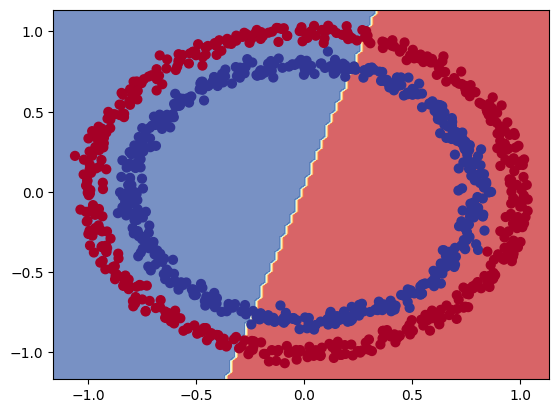

In [16]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, Y)

## Trying on a regression problem

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [18]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 560.3901 - mae: 560.3901
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 417.2743 - mae: 417.2743
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 280.4116 - mae: 280.4116
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 139.2558 - mae: 139.2558
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 54.0361 - mae: 54.0361
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 95.8344 - mae: 95.8344
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 76.4587 - mae: 76.4587
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 44.4933 - mae: 44.4933
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 52.4364 - mae: 52.4364
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 41.6546 - mae: 41.6546
Epoch 11/100
5/5 [==============================] -

5/5 [==============================] - 0s 4ms/step - loss: 38.7404 - mae: 38.7404
Epoch 88/100
5/5 [==============================] - 0s 4ms/step - loss: 38.5130 - mae: 38.5130
Epoch 89/100
5/5 [==============================] - 0s 0s/step - loss: 38.8177 - mae: 38.8177
Epoch 90/100
5/5 [==============================] - 0s 0s/step - loss: 38.4791 - mae: 38.4791
Epoch 91/100
5/5 [==============================] - 0s 4ms/step - loss: 38.0935 - mae: 38.0935
Epoch 92/100
5/5 [==============================] - 0s 4ms/step - loss: 38.7727 - mae: 38.7727
Epoch 93/100
5/5 [==============================] - 0s 0s/step - loss: 38.9513 - mae: 38.9513
Epoch 94/100
5/5 [==============================] - 0s 0s/step - loss: 37.9450 - mae: 37.9450
Epoch 95/100
5/5 [==============================] - 0s 0s/step - loss: 38.1684 - mae: 38.1684
Epoch 96/100
5/5 [==============================] - 0s 4ms/step - loss: 38.5414 - mae: 38.5414
Epoch 97/100
5/5 [==============================] - 0s 4ms/step - lo

In [19]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

2/2 [==============================] - 0s 0s/step


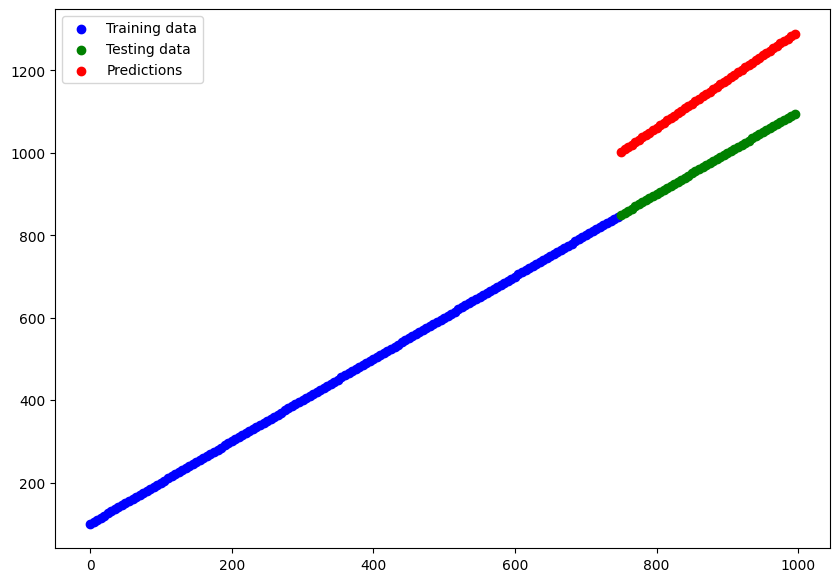

In [20]:
# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

Okay, the predictions aren't perfect (if the predictions were perfect, the red would line up with the green), but they look better than complete guessing.

So this means our model must be learning something...

There must be something we're missing out on for our classification problem.

## The missing piece: Non-linearity

In [21]:
tf.random.set_seed(42)

In [22]:
# Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile model (typing tf.keras.optimizers.Adam() allows to set up parameters)
model_4.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# Fit the model
history = model_4.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.4961 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 5.4229 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3291 - accuracy: 0.4770
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2262 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.0508 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.0274 - accuracy: 0.4760
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9150 - accuracy: 0.4760
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7131 - accuracy: 0.4750
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5510 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5433 - accuracy: 0.4740
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 3.9049 - accuracy: 0.4730
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8928 - accuracy: 0.4730
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8922 - accuracy: 0.4730
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8918 - accuracy: 0.4730
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8914 - accuracy: 0.4740
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8911 - accuracy: 0.4740
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8907 - accuracy: 0.4740
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8904 - accuracy: 0.4740
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8899 - accuracy: 0.4740
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8895 - accuracy: 0.4740
Epoch 93/100


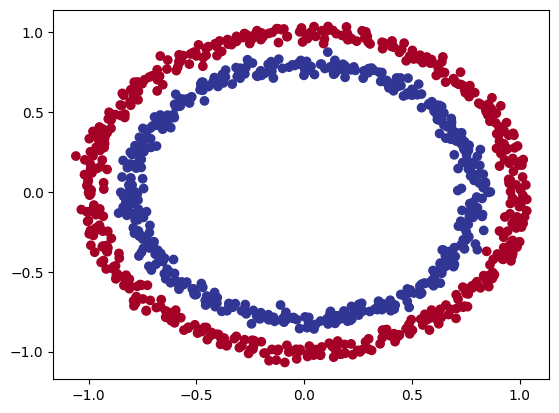

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 801us/step
doing binary classifcation...


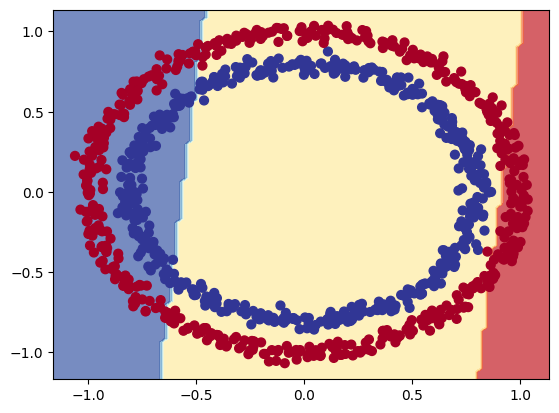

In [24]:
# Check the decision boundary
plot_decision_boundary(model=model_4, X=X, y=Y)

## Trying to build a model with non-linear function

In [25]:
tf.random.set_seed(42)

In [26]:
# Create model with non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile model (typing tf.keras.optimizers.Adam() allows to set up parameters)
model_5.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# Fit the model
history = model_5.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.8779 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8490 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8394 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8375 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8188 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8154 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8139 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8132 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7928 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7386 - accuracy: 0.4820
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 4.5714 - accuracy: 0.4710
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5701 - accuracy: 0.4710
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5688 - accuracy: 0.4710
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5676 - accuracy: 0.4710
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5663 - accuracy: 0.4710
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5650 - accuracy: 0.4710
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5639 - accuracy: 0.4710
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5627 - accuracy: 0.4710
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5615 - accuracy: 0.4710
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5604 - accuracy: 0.4710
Epoch 93/100


313/313 [==============================] - 0s 801us/step
doing binary classifcation...


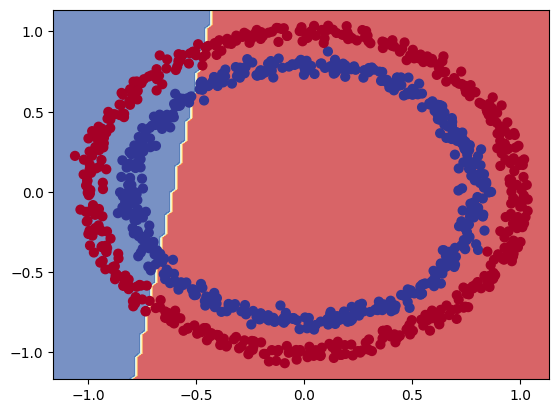

In [27]:
# Check the decision boundary
plot_decision_boundary(model=model_5, X=X, y=Y)

In [28]:
tf.random.set_seed(42)

# Create model with non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# Compile model (typing tf.keras.optimizers.Adam() allows to set up parameters)
model_6.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.1289 - accuracy: 0.4510
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9486 - accuracy: 0.3940
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8954 - accuracy: 0.3610
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8643 - accuracy: 0.3700
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8407 - accuracy: 0.3830
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8220 - accuracy: 0.3860
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8064 - accuracy: 0.3910
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7946 - accuracy: 0.3960
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7838 - accuracy: 0.3620
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7750 - accuracy: 0.3480
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.4878 - accuracy: 0.8440
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.8410
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.8500
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.8550
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4549 - accuracy: 0.8520
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4461 - accuracy: 0.8740
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8730
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.8640
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8690
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8650
Epoch 93/100


In [29]:
model_6.evaluate(X, Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.3422 - accuracy: 0.8930


[0.34215235710144043, 0.8930000066757202]

313/313 [==============================] - 0s 852us/step
doing binary classifcation...


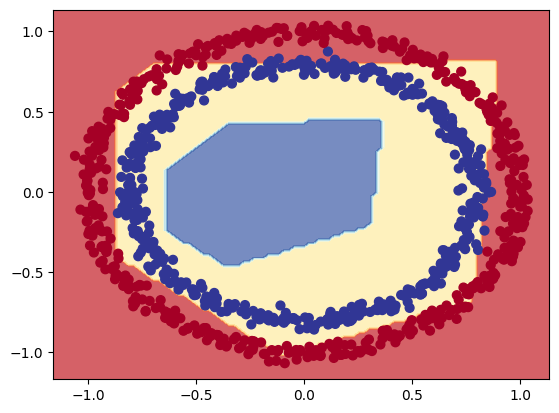

In [30]:
# Check the decision boundary
plot_decision_boundary(model=model_6, X=X, y=Y)

In [31]:
tf.random.set_seed(42)

In [32]:
# Create model with non-linear activation
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile model (typing tf.keras.optimizers.Adam() allows to set up parameters)
model_7.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, Y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 0.7054 - accuracy: 0.4990
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.4950
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.4990
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4930
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4970
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5030
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5100
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5090
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.5120
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.2764 - accuracy: 0.9710
Epoch 84/250
32/32 [==============================] - 0s 1ms/step - loss: 0.2724 - accuracy: 0.9670
Epoch 85/250
32/32 [==============================] - 0s 1ms/step - loss: 0.2670 - accuracy: 0.9710
Epoch 86/250
32/32 [==============================] - 0s 2ms/step - loss: 0.2637 - accuracy: 0.9650
Epoch 87/250
32/32 [==============================] - 0s 2ms/step - loss: 0.2586 - accuracy: 0.9730
Epoch 88/250
32/32 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.9710
Epoch 89/250
32/32 [==============================] - 0s 2ms/step - loss: 0.2492 - accuracy: 0.9710
Epoch 90/250
32/32 [==============================] - 0s 2ms/step - loss: 0.2456 - accuracy: 0.9720
Epoch 91/250
32/32 [==============================] - 0s 1ms/step - loss: 0.2427 - accuracy: 0.9700
Epoch 92/250
32/32 [==============================] - 0s 1ms/step - loss: 0.2374 - accuracy: 0.9700
Epoch 93/250


32/32 [==============================] - 0s 1ms/step - loss: 0.0987 - accuracy: 0.9850
Epoch 165/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0985 - accuracy: 0.9870
Epoch 166/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0982 - accuracy: 0.9860
Epoch 167/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0967 - accuracy: 0.9850
Epoch 168/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0962 - accuracy: 0.9870
Epoch 169/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0960 - accuracy: 0.9840
Epoch 170/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0938 - accuracy: 0.9860
Epoch 171/250
32/32 [==============================] - 0s 2ms/step - loss: 0.0935 - accuracy: 0.9860
Epoch 172/250
32/32 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9860
Epoch 173/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0923 - accuracy: 0.9870
Epoc

32/32 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9870
Epoch 246/250
32/32 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9860
Epoch 247/250
32/32 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9860
Epoch 248/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0611 - accuracy: 0.9860
Epoch 249/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0609 - accuracy: 0.9850
Epoch 250/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0597 - accuracy: 0.9860


313/313 [==============================] - 0s 851us/step
doing binary classifcation...


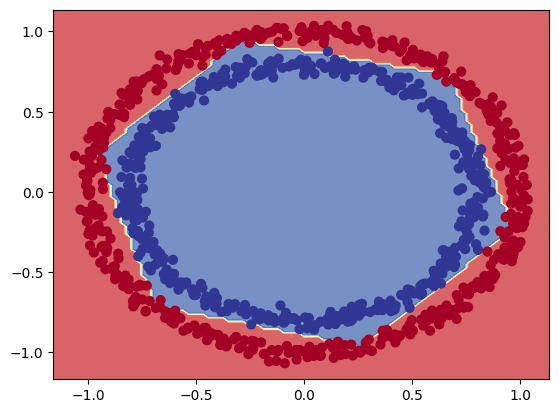

In [33]:
# Check the decision boundary
plot_decision_boundary(model=model_7, X=X, y=Y)

## Exploring even more non linearity

In [34]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

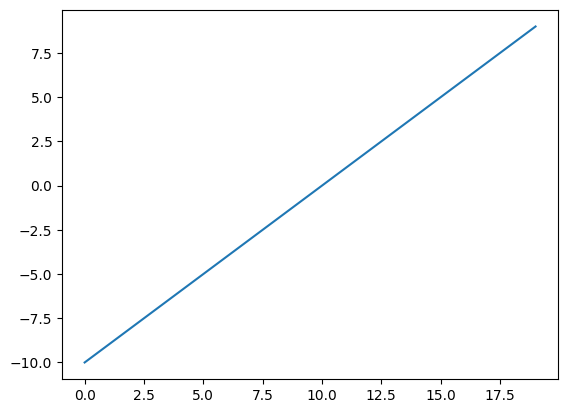

In [35]:
# Visualize the toy tensor
plt.plot(A)

In [36]:
# Replicating sigmoid
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

In [37]:
# Use the sigmoid function on A
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

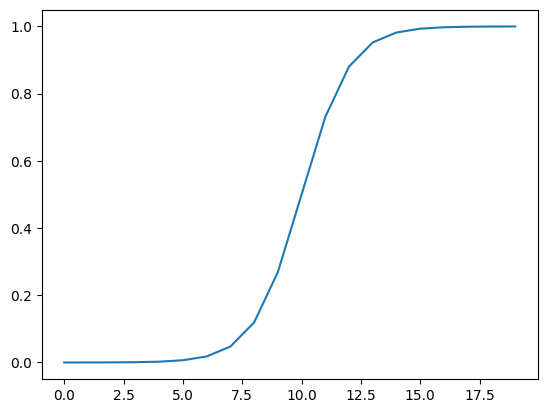

In [38]:
# Plot A transformed by sigmoid
plt.plot(sigmoid(A))

In [39]:
# Replicating ReLu
def relu(x):
    return tf.maximum(0, x)

In [40]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

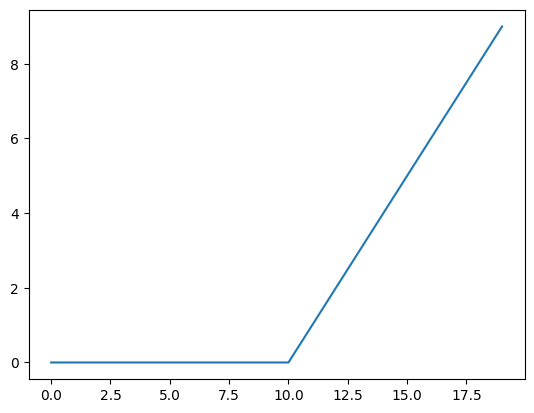

In [41]:
# Plot A transformed by ReLu
plt.plot(relu(A))

In [42]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

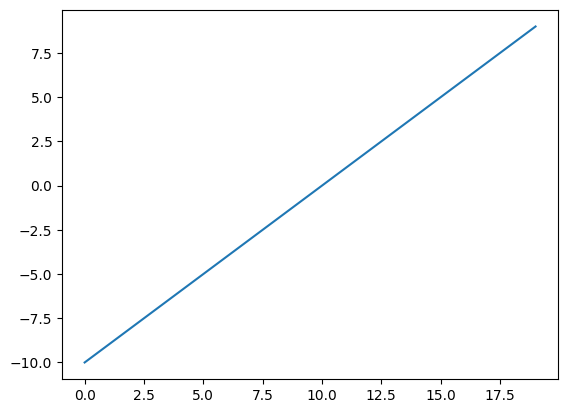

In [43]:
plt.plot(tf.keras.activations.linear(A))

In [44]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evalutation and Improvement

In [45]:
# We need to create a train and test set
len(X)

1000

In [46]:
X_train, Y_train = X[:800], Y[:800]
X_test, Y_test = X[800:], Y[800:]
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [47]:
# Let's recreate a model to fit on training data
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_8.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])

history = model_8.fit(X_train, Y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 1ms/step - loss: 0.7200 - accuracy: 0.4675
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.4650
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.4913
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.5500
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6722 - accuracy: 0.5600
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6536 - accuracy: 0.5587
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6376 - accuracy: 0.6300
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6241 - accuracy: 0.6425
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6049 - accuracy: 0.6888
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5840 - accuracy: 0.6988
Epoch 11/25
25/25 [

In [48]:
model_8.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1932 - accuracy: 0.9600


[0.19320088624954224, 0.9599999785423279]

313/313 [==============================] - 0s 901us/step
doing binary classifcation...
313/313 [==============================] - 0s 901us/step
doing binary classifcation...


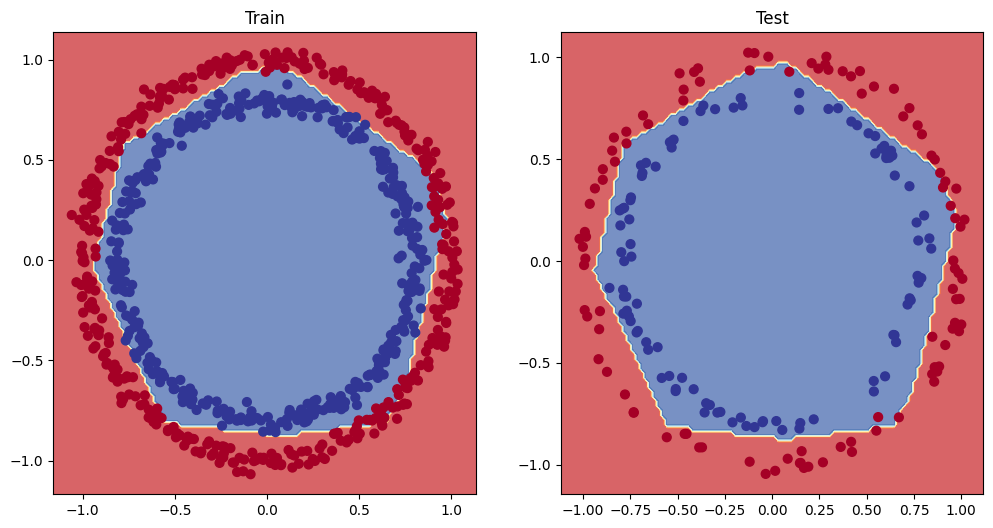

In [49]:
# Plot decision boundary for train set and test set
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_8, X=X_train, y=Y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X=X_test, y=Y_test)
plt.show()

## Plot loss (or training) curves

In [50]:
history.history

{'loss': [0.7200220227241516,
  0.6947544813156128,
  0.6838758587837219,
  0.678687572479248,
  0.6722211241722107,
  0.6536023616790771,
  0.6375851631164551,
  0.6240682005882263,
  0.6048911213874817,
  0.5839916467666626,
  0.5602940917015076,
  0.5413106679916382,
  0.5119213461875916,
  0.4844796359539032,
  0.453421950340271,
  0.4273703396320343,
  0.39985305070877075,
  0.37107571959495544,
  0.3351631164550781,
  0.31118831038475037,
  0.2731141746044159,
  0.2573881447315216,
  0.2382781207561493,
  0.2231782078742981,
  0.20611470937728882],
 'accuracy': [0.4675000011920929,
  0.4650000035762787,
  0.49125000834465027,
  0.550000011920929,
  0.5600000023841858,
  0.5587499737739563,
  0.6299999952316284,
  0.6424999833106995,
  0.6887500286102295,
  0.6987500190734863,
  0.7212499976158142,
  0.7325000166893005,
  0.7350000143051147,
  0.7574999928474426,
  0.7612500190734863,
  0.7737500071525574,
  0.8424999713897705,
  0.8837500214576721,
  0.9012500047683716,
  0.91874

In [51]:
# Load history into dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.720022,0.46750
1,0.694754,0.46500
2,0.683876,0.49125
3,0.678688,0.55000
4,0.672221,0.56000
5,0.653602,0.55875
6,0.637585,0.63000
7,0.624068,0.64250
8,0.604891,0.68875
9,0.583992,0.69875


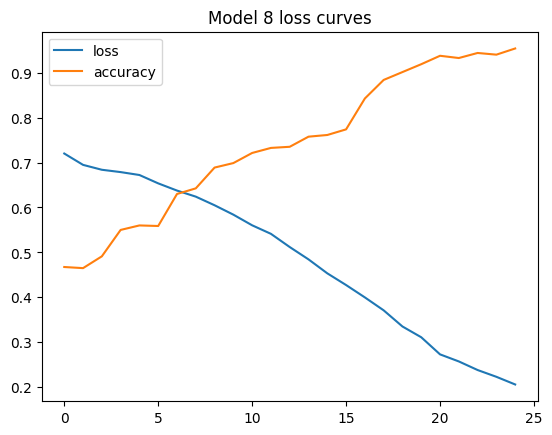

In [52]:
# Plot the curves
pd.DataFrame(history.history).plot()
plt.title('Model 8 loss curves')
plt.show()

## Finding the best learning rate

We need the following steps:
- Learning rate **callback** (extra piece of functionality while the model is trainig)
- Another model (we can use the same, but for practice we will use another)
- A modified loss curves plot

In [53]:
# Set seed
tf.random.set_seed(42)

# Create model 
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile
model_9.compile(loss='binary_crossentropy',
               optimizer='Adam',
               metrics=['accuracy'])

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

# Fit the model
history_9 = model_9.fit(X_train, Y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.6918 - accuracy: 0.4938 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5025 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5013 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

Epoch 73/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6976 - accuracy: 0.4837 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7067 - accuracy: 0.4762 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.4963 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7026 - accuracy: 0.5013 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7066 - accuracy: 0.4988 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7123 - accuracy: 0.5063 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7106 - accuracy: 0.5213 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.4963 - lr: 0.8913
Epoch 81/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7107 - accuracy: 0.5

<Axes: xlabel='epochs'>

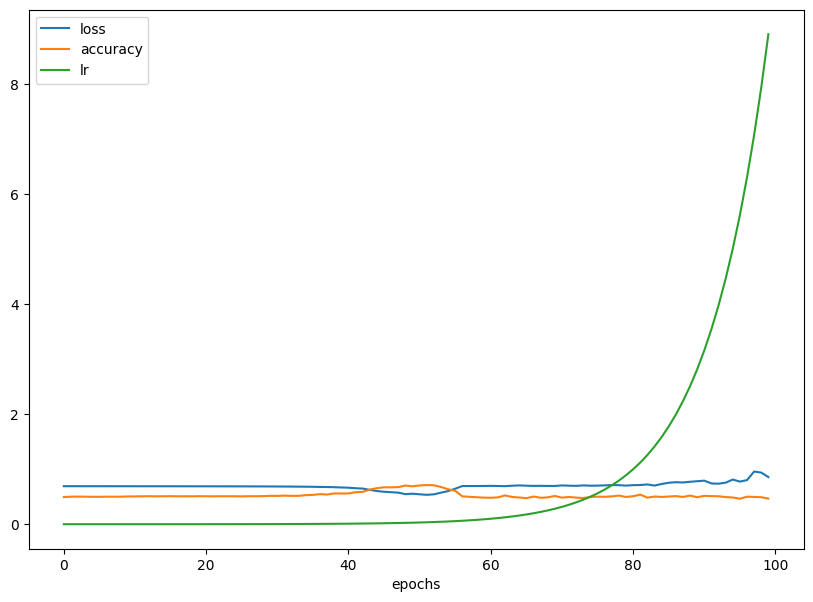

In [54]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel='epochs')

In [55]:
# Plot learning rate vs loss (same function on the callback) with a tf.range(100) as argument to simulate the 100 epochs
lrs = 1e-4 * (10**(tf.range(100) / 20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning Rate vs Loss')

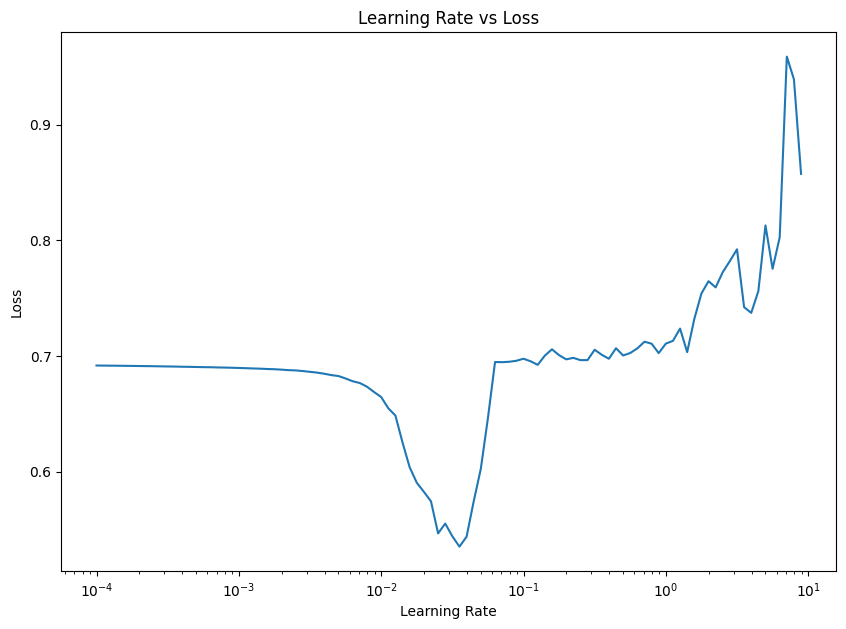

In [56]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')

In [57]:
# Lets try a higher ideal learning rate with the same model (0.02)

# Set seed
tf.random.set_seed(42)

# Create model 
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile
model_10.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
               metrics=['accuracy'])


# Fit the model
history_10 = model_10.fit(X_train, Y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 1ms/step - loss: 0.6920 - accuracy: 0.5125
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.5550
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.5763
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6611 - accuracy: 0.6037
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6422 - accuracy: 0.6600
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6041 - accuracy: 0.6812
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5671 - accuracy: 0.7362
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5305 - accuracy: 0.7650
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.7763
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4714 - accuracy: 0.7987
Epoch 11/25
25/25 [

In [58]:
model_10.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1368 - accuracy: 0.9750


[0.13677608966827393, 0.9750000238418579]

In [59]:
model_8.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1932 - accuracy: 0.9600


[0.19320088624954224, 0.9599999785423279]

**Model 8 has a higher accuracy but higher loss function**

313/313 [==============================] - 0s 851us/step
doing binary classifcation...
313/313 [==============================] - 0s 901us/step
doing binary classifcation...


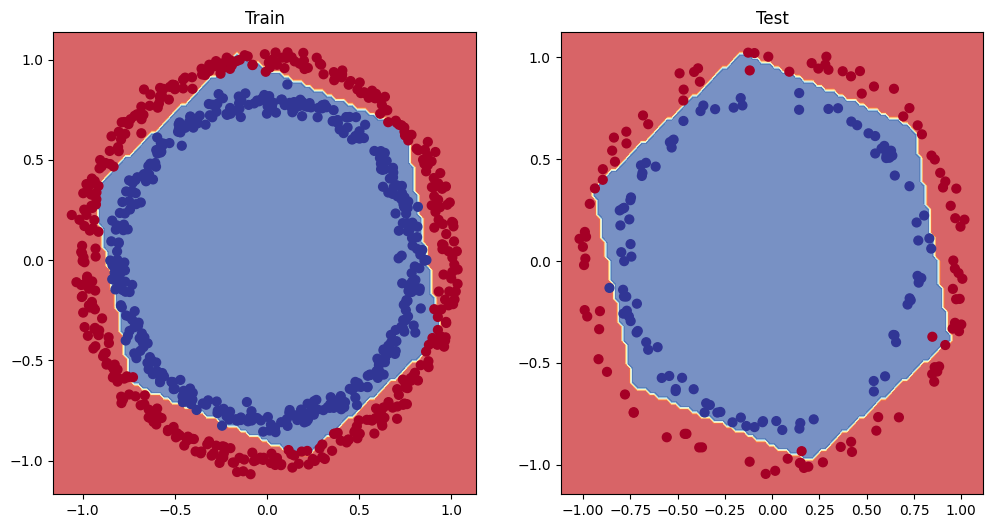

In [60]:
# Plot decision boundary for train set and test set
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_10, X=X_train, y=Y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, X=X_test, y=Y_test)
plt.show()

## More classification methods

In [61]:
# check accuracy
loss, accuracy = model_10.evaluate(X_test, Y_test)
print(f'Model loss on test set: {loss}')
print(f'Model accuracy on test set: {accuracy * 100:.2f}%')

7/7 [==============================] - 0s 0s/step - loss: 0.1368 - accuracy: 0.9750
Model loss on test set: 0.13677608966827393
Model accuracy on test set: 97.50%


In [62]:
# Create confusion matrix
Y_preds = model_10.predict(X_test)

# Y_preds comes in prediction probability form, the standard output of the sigmoid (or softmax) activation functions
# We convert the prediction probabilities to binary format using tf.round()

# Confusion matrix
confusion_matrix(Y_test, tf.round(Y_preds))


7/7 [==============================] - 0s 0s/step


array([[97,  4],
       [ 1, 98]], dtype=int64)

## Making the confusion matrix prettier

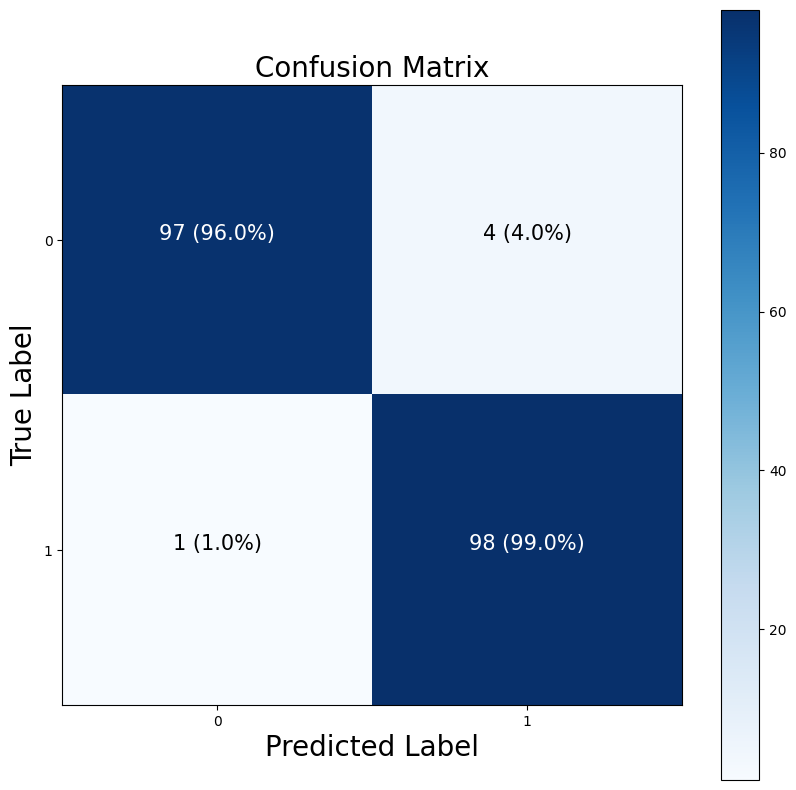

In [63]:
figsize=(10, 10)

# Create confusion matrix
cm = confusion_matrix(Y_test, tf.round(Y_preds))
# Normalize confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title='Confusion Matrix', 
      xlabel='Predicted Label',
      ylabel='True Label',
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes), 
      xticklabels=labels,
      yticklabels=labels)

# Set x-axis to the bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()


# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)


# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text in each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)', horizontalalignment='center', color='white' if cm[i, j] > threshold else 'black', size=15)
    

## Multiclass Classification

We are going to build a NN to classify clothes items.

In [64]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [65]:
# The data set is already split into train and test
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [66]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [67]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

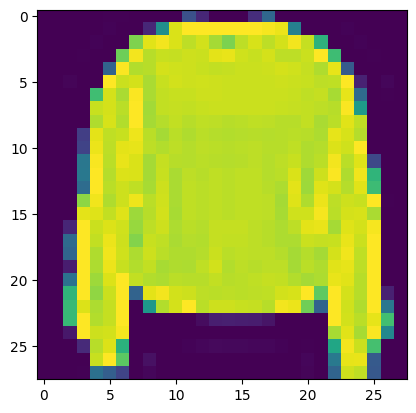

In [70]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [71]:
# Check our samples label (From docs we get that 2 corresponds to a Pullover)
train_labels[7]

2

In [72]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [73]:
# How many classes are there (this'll be our output shape)?
len(class_names)

10

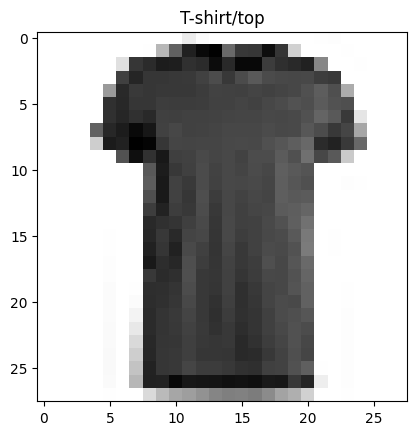

In [74]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

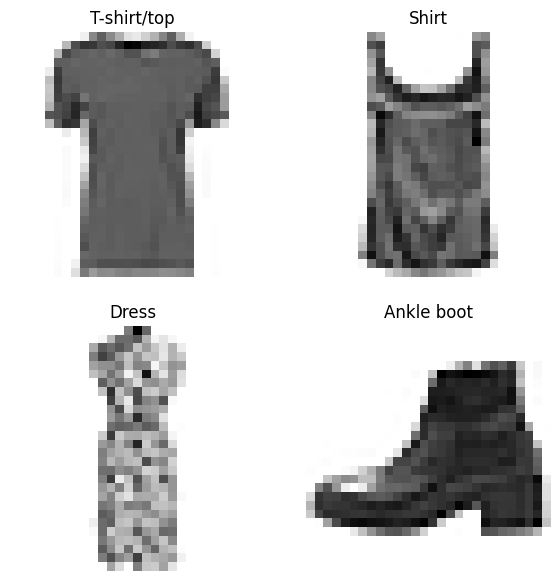

In [75]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):
- The input shape will have to deal with 28x28 tensors (the height and width of our images).
    - We're actually going to squash the input into a tensor (vector) of shape (784).
- The output shape will have to be 10 because we need our model to predict for 10 different classes.
    - We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
- We'll need to change our loss function from a binary loss function to a multiclass loss function.
    - More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().
- We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.


## Creating the neural network

In [76]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3092 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: